In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA 
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error

In [13]:
df = pd.read_csv(r"C:\Users\UDAY KUMAR\Documents\whatsapp\DA\ML\Data\train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [15]:
# Convert 'Order Date' to datetime (day-first format)
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Set index
df = df.set_index('Order Date')

# Resample sales by month-start
monthly_sales = df['Sales'].resample('MS').sum().reset_index()
monthly_sales = monthly_sales.rename(columns={"Order Date": "ds", "Sales": "y"})


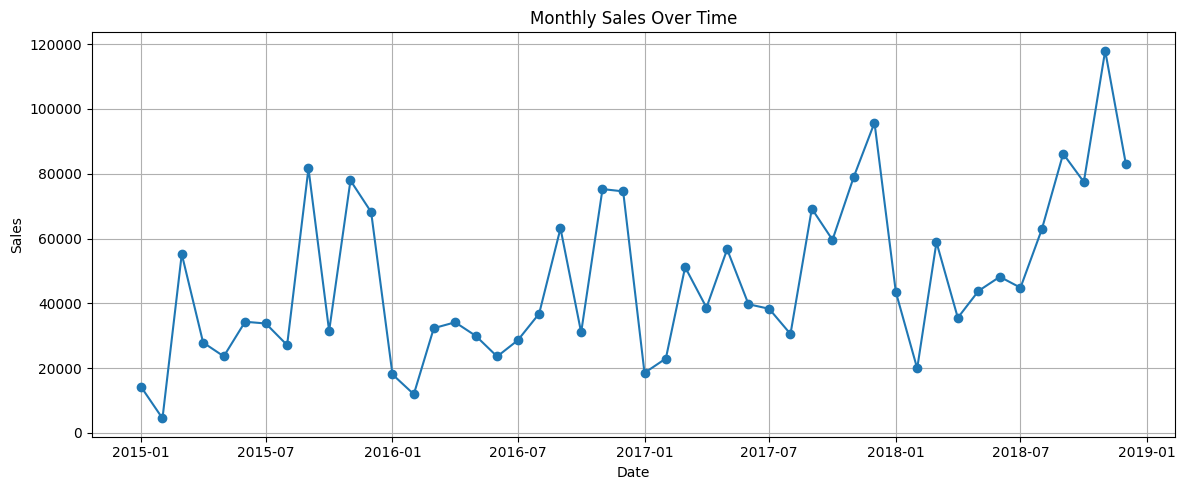

In [16]:
plt.figure(figsize=(12, 5))
plt.plot(monthly_sales['ds'], monthly_sales['y'], marker='o', linestyle='-')
plt.title("Monthly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
# Set index for ARIMA
arima_series = monthly_sales.set_index('ds')['y']

In [21]:
# Fit ARIMA model (simple order can be optimized later)
arima_model = ARIMA(arima_series, order=(1, 1, 1))
arima_result = arima_model.fit()

C:\Users\UDAY KUMAR\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\UDAY KUMAR\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\UDAY KUMAR\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [22]:
# Forecast next 12 months
arima_forecast = arima_result.forecast(steps=12)

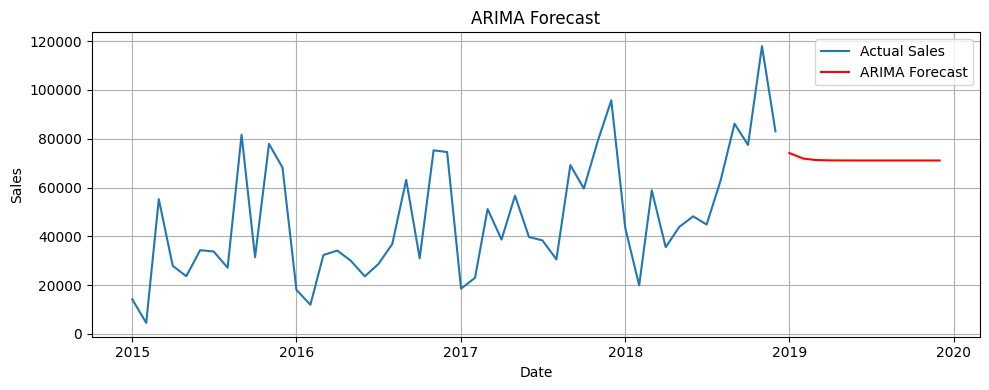

In [23]:
# Plot ARIMA forecast
plt.figure(figsize=(10, 4))
plt.plot(arima_series.index, arima_series, label='Actual Sales')
plt.plot(pd.date_range(start=arima_series.index[-1] + pd.offsets.MonthBegin(),
                       periods=12, freq='MS'),
         arima_forecast, label='ARIMA Forecast', color='red')
plt.title("ARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
prophet_model = Prophet(yearly_seasonality=True)
prophet_model.fit(monthly_sales)

20:08:12 - cmdstanpy - INFO - Chain [1] start processing
20:08:13 - cmdstanpy - INFO - Chain [1] done processing


In [25]:
future = prophet_model.make_future_dataframe(periods=12, freq='MS')
forecast = prophet_model.predict(future)

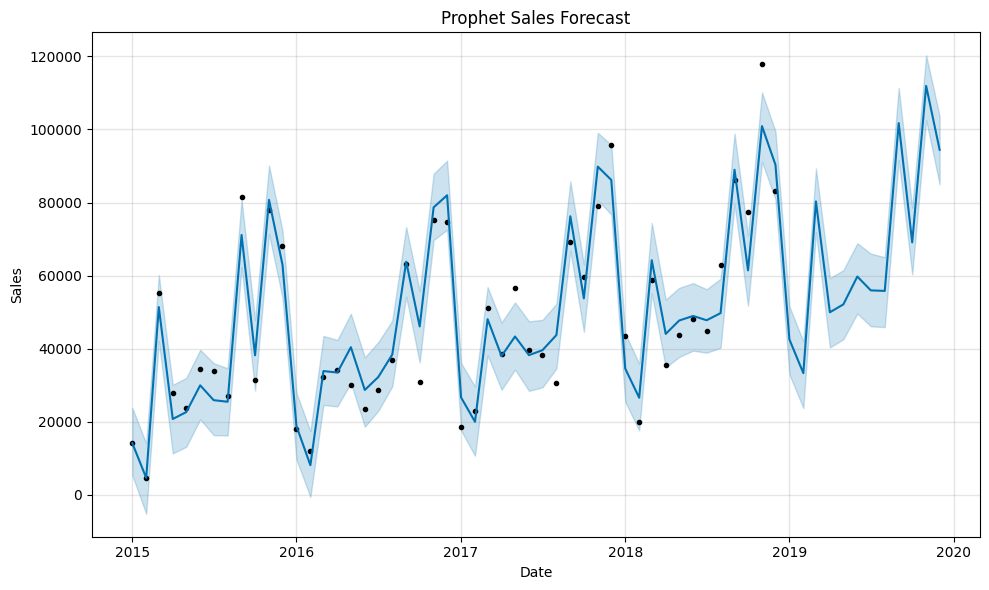

In [26]:
prophet_model.plot(forecast)
plt.title("Prophet Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

In [27]:
# Compare last 12 actuals with Prophet predictions
actual = arima_series[-12:].values
predicted = forecast['yhat'][-24:-12].values